# 1. Import and Install Dependencies

In [1]:
!pip install --upgrade pip

In [2]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:





def mediapipe_detection(img,model):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img.flags.writeable = False
    results = model.process(img)
    img.flags.writeable = True
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    return img, results


# In[5]:


def draw_landmarks(img, results):
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    


# In[6]:






def draw_styled_lm(img,results):
    #face connections
    mp_drawing.draw_landmarks(img, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    
    #pose connections
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    
    #left hand connections
    mp_drawing.draw_landmarks(img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             
                             ) 
    
    
    #right hand connections
    mp_drawing.draw_landmarks(img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             
                             )    
    



In [5]:
get_ipython().run_line_magic('pinfo2', 'mp_drawing.draw_landmarks')


Object `mp_drawing.draw_landmarks` not found.


In [6]:
get_ipython().run_line_magic('pinfo2', 'mp_drawing.draw_landmarks')


Object `mp_drawing.draw_landmarks` not found.


In [7]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


In [8]:

mp_holistic.POSE_CONNECTIONS


frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [9]:

capture1= cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
     while capture1.isOpened():
        ret,frame = capture1.read()
        
        #make detections
        img, results = mediapipe_detection(frame,holistic)
        print(results)
        
        
        #draw landmarks
        draw_styled_lm(img,results)
        
        #show to the screen
        cv2.imshow('OpenCV Feed',img)
        
        #break gracefullyqq
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
capture1.release()
cv2.destroyAllWindows()


I0000 00:00:1710394252.322989  257831 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [10]:
frame

array([[[119, 122, 142],
        [123, 125, 145],
        [119, 122, 142],
        ...,
        [142, 152, 158],
        [145, 156, 161],
        [155, 165, 170]],

       [[124, 126, 146],
        [117, 119, 139],
        [118, 121, 140],
        ...,
        [145, 156, 159],
        [153, 164, 168],
        [163, 174, 177]],

       [[124, 126, 146],
        [119, 122, 142],
        [119, 122, 142],
        ...,
        [152, 163, 166],
        [162, 172, 176],
        [166, 177, 180]],

       ...,

       [[204, 216, 206],
        [206, 217, 207],
        [204, 216, 206],
        ...,
        [139, 147, 153],
        [139, 147, 153],
        [137, 145, 151]],

       [[203, 215, 205],
        [206, 217, 207],
        [203, 215, 205],
        ...,
        [139, 147, 153],
        [137, 145, 151],
        [135, 143, 148]],

       [[201, 213, 202],
        [204, 216, 206],
        [202, 214, 203],
        ...,
        [138, 146, 152],
        [136, 144, 150],
        [130, 138, 144]]

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

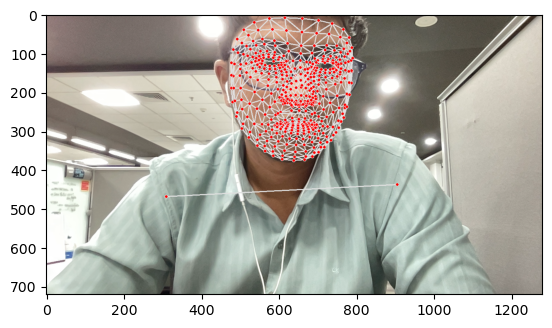

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeroes(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.51637256,  0.25479677, -1.06712627, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.51637256,  0.25479677, -1.06712627, ...,  0.        ,
        0.        ,  0.        ])

In [24]:

get_ipython().system('pip install dataclasses')

/opt/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


# 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 


In [26]:
#actions that are predicted
actions = np.array(['Namaskara','Uta aytha','Thapu'])
#number of video sequences
no_sequences = 30

#30 video frames in length

seq_len = 30

#cange both from 5 to 30

In [27]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# 5. Collect Keypoint Values for Training and Testing

In [28]:

capture1 = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(seq_len):

                # Read feed
                ret, frame = capture1.read()

                # Make detections
                img, results = mediapipe_detection(frame, holistic)
#                 print(results)


                # Draw landmarks
                draw_styled_lm(img, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(img, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(img, 'Capturing frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', img)
                    cv2.waitKey(1000)
                    #change it to 5000
                else: 
                    cv2.putText(img, 'Capturing frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', img)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    capture1.release()
    cv2.destroyAllWindows()


I0000 00:00:1710394413.843399  257831 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


In [29]:

capture1.release()
cv2.destroyAllWindows()


# 6. Preprocess Data and Create Labels and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'Namaskara': 0, 'Uta aytha': 1, 'Thapu': 2}

In [33]:
sequences, labels = [], []



In [34]:
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(seq_len-1):
            
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [35]:
sequences

[[array([ 0.51225775,  0.36272523, -1.44246411, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50936639,  0.36350712, -0.87522948, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50344265,  0.36541939, -0.91211355, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50355875,  0.36632827, -1.03583217, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50393313,  0.36420923, -0.93300134, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50397748,  0.36425784, -0.9539355 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50399148,  0.36289597, -0.93971789, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50394624,  0.36289889, -0.96115351, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.50257039,  0.34484947, -0.84082377, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48505646,  0.32695973, -0.86301833, ...,  0.        ,
       

In [36]:
np.array(sequences).shape

(90, 29, 1662)

In [37]:
np.array(labels).shape

(90,)

In [38]:
X = np.array(sequences)
X

array([[[ 0.51225775,  0.36272523, -1.44246411, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50936639,  0.36350712, -0.87522948, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.50344265,  0.36541939, -0.91211355, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.44315535,  0.23131607, -1.01844287, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44401199,  0.23080608, -1.20422971, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.44538766,  0.23075505, -1.12013912, ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.44857708,  0.22783515, -1.29282153, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.46498117,  0.31820393, -1.22510815, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.48784369,  0.36282608, -1.30163074, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.47415739,  0.38362333, -0.90839416, ...,  

In [39]:
X.shape

(90, 29, 1662)

In [40]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [42]:
y_test.shape

(5, 3)

In [43]:

X_train.shape

(85, 29, 1662)

# 7. Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/Users/prashanths/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
actions.shape[0]

3

In [48]:
res = [.7, 0.2, 0.1]

In [49]:
actions[np.argmax(res)]


'Namaskara'

In [50]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [51]:
# Replace the deprecated method
# From:
# tf.executing_eagerly_outside_functions
# To:
# tf.compat.v1.executing_eagerly_outside_functions




# don not run this
import tensorflow as tf



# Check if eager execution is enabled outside functions
if not tf.compat.v1.executing_eagerly_outside_functions():
    print("Eager execution is enabled outside functions.")
else:
    print("Eager execution is not enabled outside functions.")

tf.compat.v1.enable_eager_execution()



Eager execution is not enabled outside functions.


In [52]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - categorical_accuracy: 0.3600 - loss: 1.1467
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.4169 - loss: 1.1258
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3405 - loss: 1.2883
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3640 - loss: 1.1023
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.4109 - loss: 1.0870
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.4735 - loss: 1.0790
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.4422 - loss: 1.0774
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.3778 - loss: 1.0711
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.5107 - loss: 1.0519
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.4579 - loss: 1.0084
Epoch 11/2000
3/3 ━━━━━━━━━━━

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [54]:
res = model.predict(X_test)
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


array([[1.00000000e+00, 9.35300464e-17, 1.50462157e-10],
       [2.12919973e-20, 2.13241425e-09, 1.00000000e+00],
       [1.02983663e-15, 9.99992728e-01, 7.23385619e-06],
       [1.05406244e-20, 1.21451260e-09, 1.00000000e+00],
       [1.00000000e+00, 2.18799128e-11, 1.09265119e-09]], dtype=float32)

In [55]:
print(X_test.shape)


(5, 29, 1662)


In [56]:
from keras.preprocessing.sequence import pad_sequences

#Assuming X_test has shape (2, 1, 1662)
X_test_padded = pad_sequences(X_test, maxlen=29, padding='post', truncating='post')

In [57]:
res = model.predict(X_test_padded)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [58]:
actions[np.argmax(res[4])]

'Uta aytha'

In [59]:
actions[np.argmax(y_test[4])]

'Namaskara'

In [60]:
import numpy as np

# Assuming X_test is your test data
res = model.predict(X_test)

# Assuming you want to take an action based on the prediction for the 5th sample (index 4)
#channeg it to 4
predicted_class = np.argmax(res[4])


# actions is assumed to be a list or array with actions corresponding to class indices
action_to_take = actions[predicted_class]

print(f"Predicted class: {predicted_class}")
print(f"Action to take: {action_to_take}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: 0
Action to take: Namaskara


# 9. Save Weights

In [61]:
model

<Sequential name=sequential, built=True>

In [62]:
model.save('action.h5')

In [63]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]])

In [68]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [69]:
from scipy import stats

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [72]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
sequence = []
sentence = []
threshold = 0.8

capture1 = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while capture1.isOpened():

        # Read feed
        ret, frame = capture1.read()

        # Make detections
        img, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_lm(img, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            img = prob_viz(res, actions, img, colors)
        cv2.rectangle(img, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(img, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', img)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    capture1.release()
    cv2.destroyAllWindows()


I0000 00:00:1710395373.664317  257831 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:

capture1.release()
cv2.destroyAllWindows()

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))